In [112]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import LocalOutlierFactor

In [70]:
columns = pd.read_csv('columns.csv')
responses = pd.read_csv('responses.csv')

In [129]:
demographic_columns = ['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Only child', 'Village - town', 'House - block of flats']
categorical_columns = ['Alcohol', 'Smoking', 'Internet usage', 'Lying', 'Punctuality']
numerical_responses = responses.drop(columns=demographic_columns+categorical_columns)

# Visualizing the Dataset

In [71]:
responses.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [97]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


### Looking at demographic features

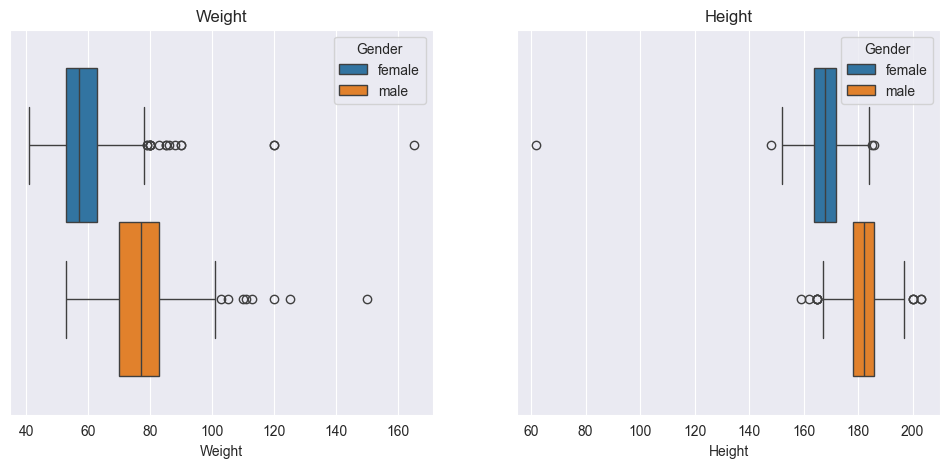

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.boxplot(data=responses, x='Weight', hue='Gender', ax=axes[0]).set_title('Weight')
sns.boxplot(data=responses, x='Height', hue='Gender', ax=axes[1]).set_title('Height')
plt.show()

In [122]:
responses[responses['Gender']=='male'].describe()[['Weight', 'Height']]

,Weight,Height
count,405.000000,405.000000
mean,77.088889,181.758025
std,11.349838,6.964600
min,53.000000,159.000000
25%,70.000000,178.000000
50%,77.000000,182.000000
75%,83.000000,186.000000
max,150.000000,203.000000


In [123]:
responses[responses['Gender']=='female'].describe()[['Weight', 'Height']]

,Weight,Height
count,580.000000,580.00000
mean,58.963793,167.77069
std,10.005719,7.51952
min,41.000000,62.00000
25%,53.000000,164.00000
50%,57.000000,168.00000
75%,63.000000,172.00000
max,165.000000,186.00000


In [130]:
responses[responses['Weight'] > 115][demographic_columns]

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Only child,Village - town,House - block of flats
292,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,no,city,house/bungalow
793,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,no,city,house/bungalow
859,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,no,city,block of flats
885,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,yes,city,house/bungalow
973,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,no,city,block of flats
992,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,no,city,block of flats


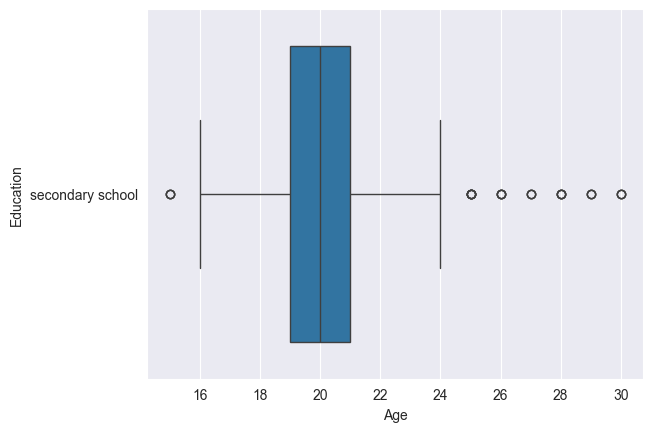

In [136]:
sns.boxplot(data=responses[responses['Education']=='secondary school'], x='Age', y='Education')
plt.show()

### Next

IndexError: index 0 is out of bounds for axis 0 with size 0

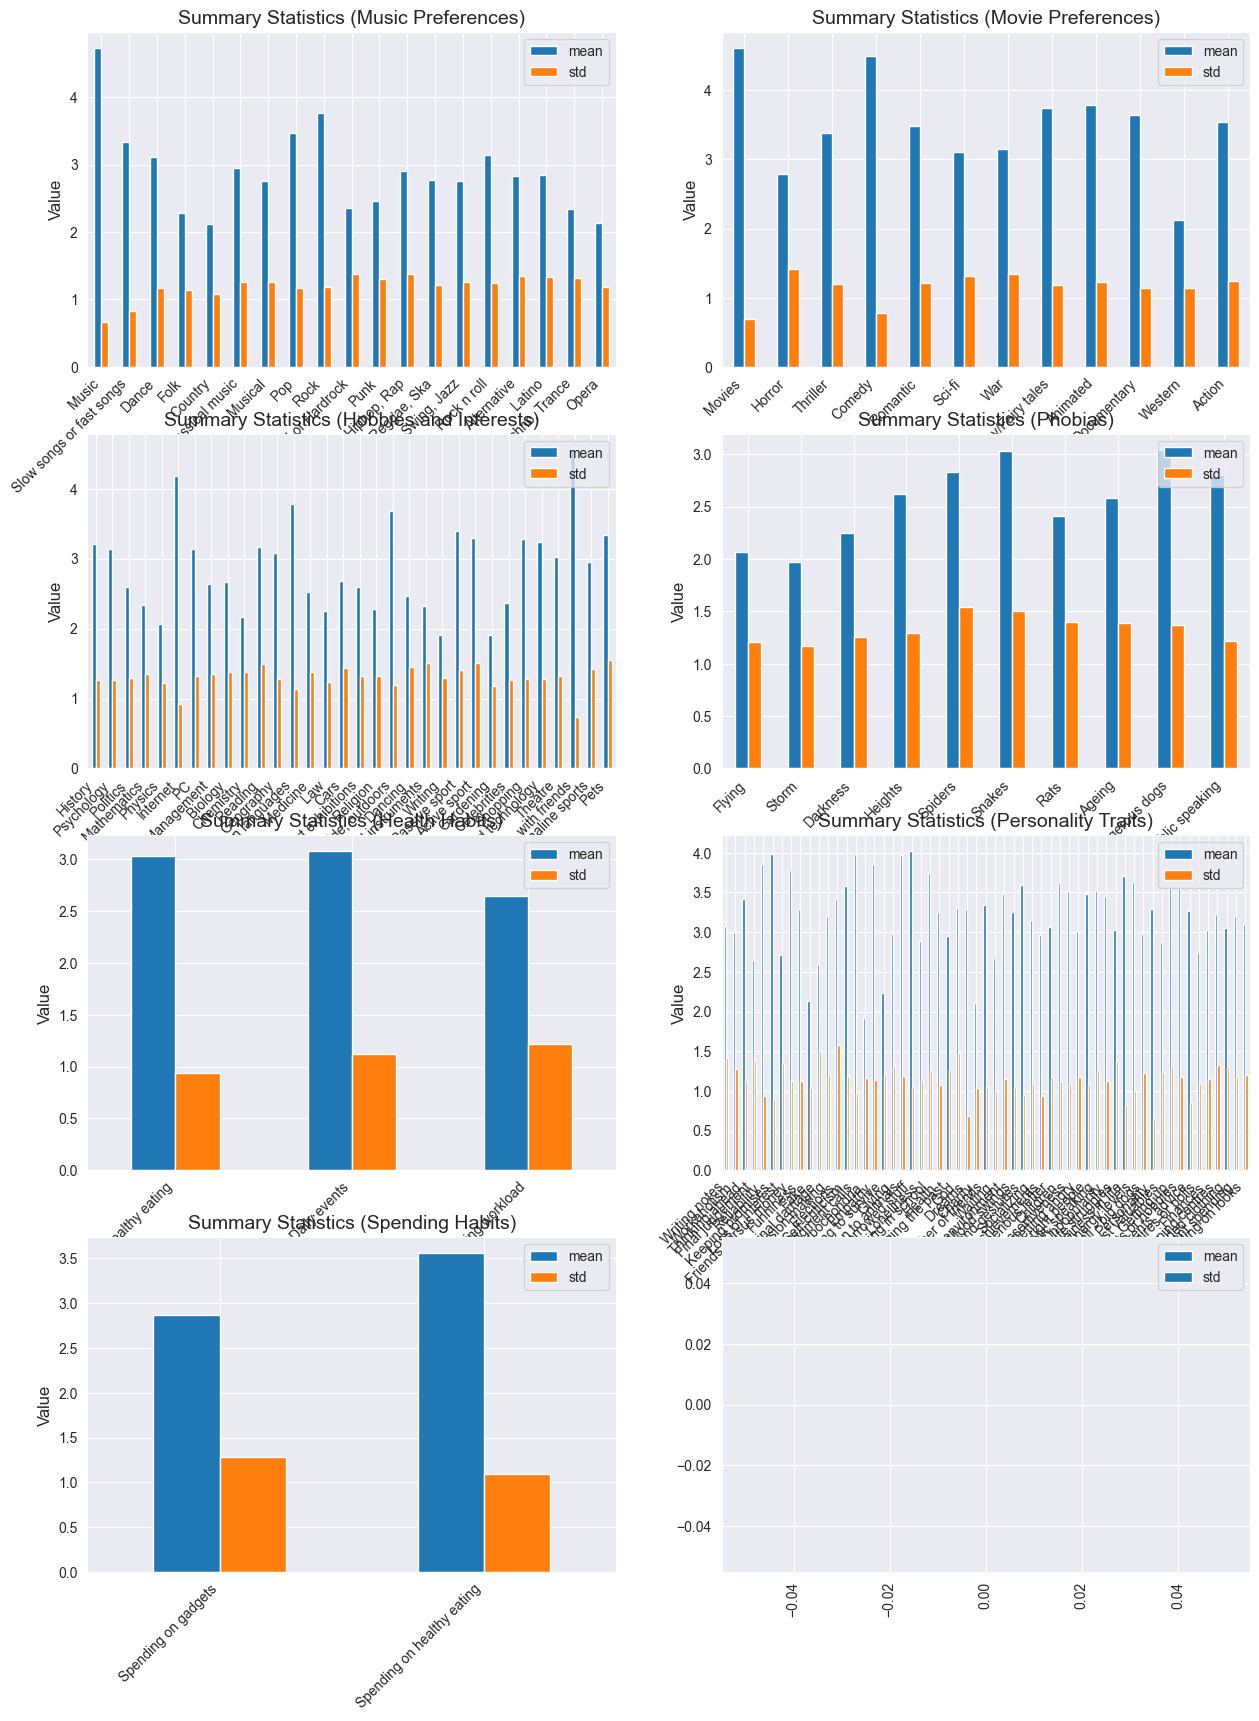

In [127]:
desc_transposed = numerical_responses.describe().T

column_groups = [
    numerical_responses.columns[0:19].tolist(),    # Columns 1-19
    numerical_responses.columns[19:31].tolist(),   # Columns 20-32
    numerical_responses.columns[31:63].tolist(),   # Columns 33-55
    numerical_responses.columns[63:73].tolist(),   # Columns 56-66
    numerical_responses.columns[73:76].tolist(),   # Custom group (Columns 67-69)
    numerical_responses.columns[76:133].tolist(),  # Custom group (Columns 70-126)
    numerical_responses.columns[133:140].tolist(), # Custom group (Columns 127-133)
    numerical_responses.columns[140:150].tolist()  # Custom group (Columns 134-144)
]
num_plots = len(column_groups)  # Number of charts
cols = 2                          # Number of subplot columns
rows = math.ceil(num_plots / cols)  # Number of subplot rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten in case of multiple rows

subplot_titles = ['Music Preferences', 'Movie Preferences', 'Hobbies and Interests', 'Phobias', 'Health Habits', 'Personality Traits', 'Spending Habits', 'Demographics']
for i, group in enumerate(column_groups):
    subset = desc_transposed.loc[group][['mean', 'std']]
    
    ax = axes[i]
    subset.plot(kind='bar', ax=ax)
    
    ax.set_title(f"Summary Statistics ({subplot_titles[i]})", fontsize=14)
    ax.set_ylabel("Value", fontsize=12)
    ax.set_xticklabels(subset.index, rotation=45, ha='right')
    ax.legend(loc='upper right', fontsize=10)
    
    # Optional: Adjust layout within each subplot
    ax.tick_params(axis='both', which='major', labelsize=10)

# ------------------- 6. Handle Unused Subplots -------------------
for j in range(i + 1, len(axes)):
   fig.delaxes(axes[j])  # Remove unused subplots

# ------------------- 7. Finalize and Display -------------------
plt.tight_layout()
# plt.subplots_adjust(hspace=9.5, wspace=0.3)
plt.show()


In [119]:


cols_big5 = pd.read_csv('/kaggle/input/young-people-survey-columns-with-big-5-markers/Survey Columns with Big 5.csv')
cols_big5[cols_big5['Big 5 Trait'].notnull()]



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/young-people-survey-columns-with-big-5-markers/Survey Columns with Big 5.csv'

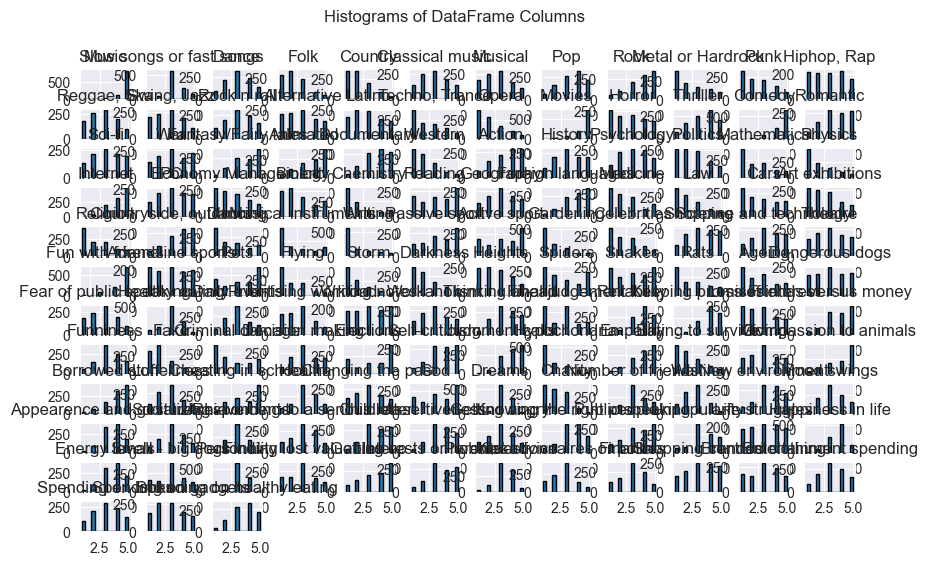

In [75]:
numerical_responses.hist(bins=15, figsize=(10, 6), edgecolor='black')
plt.suptitle("Histograms of DataFrame Columns")
plt.show()


<Axes: xlabel='Weight'>

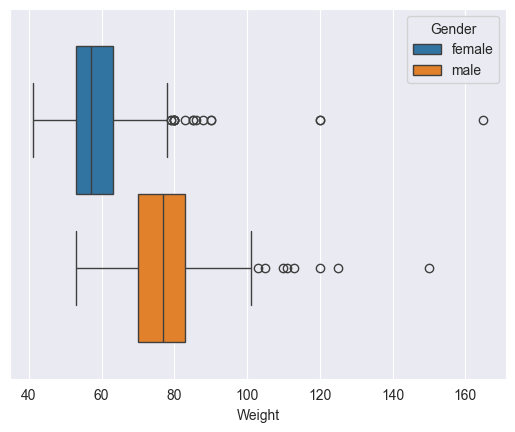

In [76]:
sns.boxplot(x=responses["Weight"], hue=responses["Gender"])

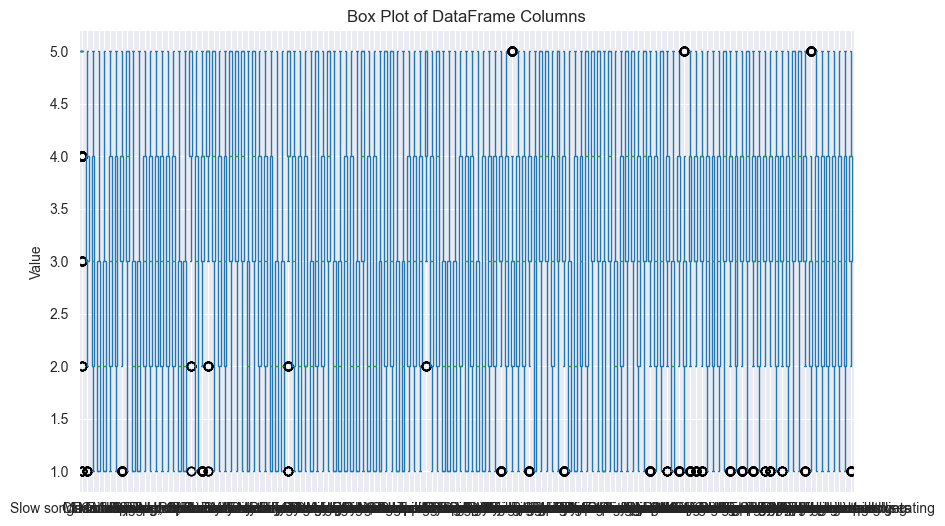

In [77]:
# Plot boxplots to show distribution of columns
numerical_responses.plot(kind='box', figsize=(10, 6))
plt.title("Box Plot of DataFrame Columns")
plt.ylabel("Value")
plt.show()


In [78]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [79]:
responses.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [80]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# Null Value Imputation

In [81]:
import pandas as pd

def hot_encode_columns(df, columns):
    """
    Perform one-hot encoding on specified columns of a dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe to encode.
    columns (list of str): List of column names to encode.

    Returns:
    pandas.DataFrame: The dataframe with one-hot encoded columns.
    """
    return pd.get_dummies(df, columns=columns)

def ordinal_encode_columns(df, columns, mappings):
    """
    Map the specified columns according to the provided mapping.

    Parameters:
    df (pandas.DataFrame): The dataframe to encode.
    columns (list of str): List of column names to encode.
    mappings (dict): A dictionary where each key is a column name and the value is a mapping dict for that column.

    Returns:
    pandas.DataFrame: The dataframe with ordinal encoded columns.
    """
    df = df.copy()
    for col in columns:
        mapping = mappings[col]
        df[col] = df[col].str.lower().map(mapping)
    return df

In [82]:
responses[['Alcohol', 'Smoking', 'Internet usage', 'Lying', 'Punctuality']].isnull().sum()

Alcohol           5
Smoking           8
Internet usage    0
Lying             2
Punctuality       2
dtype: int64

In [83]:
data = responses.copy()
# Mapping timekeeping to ordinal scale
timekeeping_map = {
    'i am often running late': 1,
    'i am often early': 3,
    'i am always on time': 5
}

lie_map = {
    'never': 1,
    'only to avoid hurting someone': 2.25,
    'sometimes': 3.75,
    'everytime it suits me': 5
}

internet_map = {
    'no time at all': 1,
    'less than an hour a day': 2.25,
    'few hours a day': 3.75,
    'most of the day': 5
}

smoking_map = {
    'never smoked': 1,
    'tried smoking': 2.25,
    'former smoker': 3.75,
    'current smoker': 5
}

drinking_map = {
    'never': 1,
    'social drinker': 2,
    'drink a lot': 3
}

data['Alcohol'] = data['Alcohol'].str.lower().map(drinking_map)
data['Smoking'] = data['Smoking'].str.lower().map(smoking_map)
data['Internet usage'] = data['Internet usage'].str.lower().map(internet_map)
data['Lying'] = data['Lying'].str.lower().map(lie_map)
data['Punctuality'] = data['Punctuality'].str.lower().map(timekeeping_map)

In [84]:
data = pd.get_dummies(data, columns = ['Number of siblings', 'Left - right handed', 'Gender','Education', 'Only child', 'Village - town', 'House - block of flats'])

In [85]:
data

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,False,False,False,False,True,False,False,True,True,False
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,False,False,False,False,True,False,True,False,True,False
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,False,False,False,True,True,False,True,False,True,False
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,True,True,False,False,True
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,False,False,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,False,False,False,True,True,False,True,False,False,True
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,False,True,False,False,True,False,False,True,False,True
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,False,False,False,True,False,True,True,False,True,False
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,False,False,False,False,True,False,True,False,True,False


In [86]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)

In [87]:
# LOF model
lof = LocalOutlierFactor(n_neighbors=2000)

# Fit the model and predict outliers
outliers = lof.fit_predict(data_imputed)

# View the results
data_imputed['outlier'] = outliers
data_imputed['anomaly_score'] = lof.negative_outlier_factor_

# Display the DataFrame with outlier and score information
print(data_imputed)

C:\.School\ISCS 30.46\Project1\.venv\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning: n_neighbors (2000) is greater than the total number of samples (1010). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
data = numerical_responses

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Example: Assuming 'data' is your pandas DataFrame
# Create a KNN Imputer with a specific number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to your dataset
# It will replace missing values using the mean (for numerical) or most common category (for categorical) based on the nearest neighbors
data_imputed = imputer.fit_transform(data)

# Convert the result back to a DataFrame (if you want to keep the DataFrame structure)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)


In [ ]:
data_imputed.isnull().sum()

In [ ]:
data2 = data_imputed

In [34]:
data2 = numerical_responses.dropna()

In [ ]:
# LOF model
lof = LocalOutlierFactor(n_neighbors=20)

# Fit the model and predict outliers
outliers = lof.fit_predict(data2)

# View the results
data2['outlier'] = outliers
data2['anomaly_score'] = lof.negative_outlier_factor_

data2

In [44]:
null_responses = responses.isnull()

# Filter rows where at least one value is True (i.e., where there's a missing value)
null_responses_filtered = null_responses[null_responses.sum(axis=1) > 5]

null_responses_filtered

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
63,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
487,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


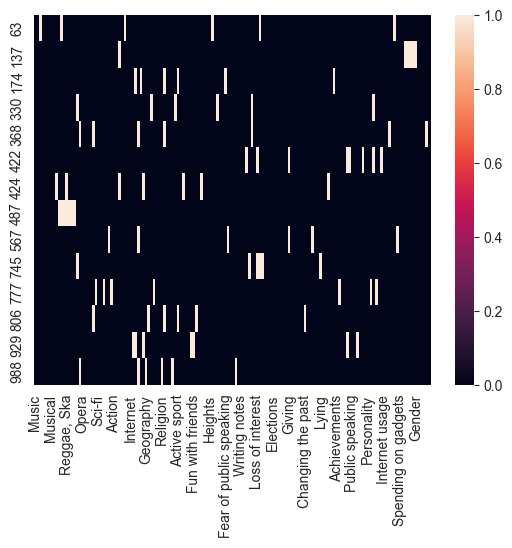

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing values with a heatmap
sns.heatmap(null_responses_filtered, cbar=True)
plt.show()


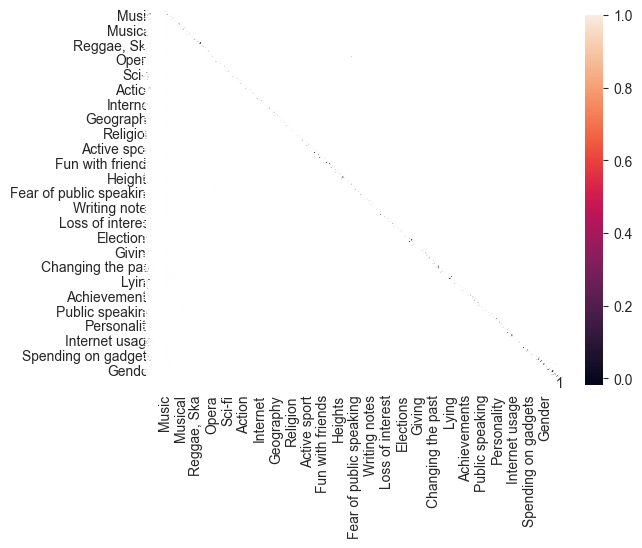

In [37]:
missing_corr = responses.isnull().corr()
sns.heatmap(missing_corr, annot=True)
plt.show()

In [38]:
# Check missing percentage for each column
missing_percentage = responses.isnull().mean() * 100


In [39]:
missing_percentage

Music                       0.29703
Slow songs or fast songs    0.19802
Dance                       0.39604
Folk                        0.49505
Country                     0.49505
                             ...   
Left - right handed         0.29703
Education                   0.09901
Only child                  0.19802
Village - town              0.39604
House - block of flats      0.39604
Length: 150, dtype: float64

In [41]:
data2 = responses[['Gender', 'Height', 'Weight']].dropna()
data2 = hot_encode_columns(data2, ['Gender'])
# LOF model
lof = LocalOutlierFactor(n_neighbors=50)

# Fit the model and predict outliers
outliers = lof.fit_predict(data2)

# View the results
data2['outlier'] = outliers
data2['anomaly_score'] = lof.negative_outlier_factor_

data2['BMI'] = data2['Weight'] / ((data2['Height']/100) ** 2)
data2 #[data2['outlier'] == -1]['BMI']

,Height,Weight,Gender_female,Gender_male,outlier,anomaly_score,BMI
0,163.0,48.0,True,False,1,-1.044010,18.066167
1,163.0,58.0,True,False,1,-1.044021,21.829952
2,176.0,67.0,True,False,1,-0.999977,21.629649
3,172.0,59.0,True,False,1,-0.984513,19.943213
4,170.0,59.0,True,False,1,-0.996296,20.415225
...,...,...,...,...,...,...,...
1005,164.0,57.0,True,False,1,-1.007625,21.192742
1006,183.0,80.0,False,True,1,-0.957701,23.888441
1007,173.0,75.0,True,False,1,-1.081248,25.059307
1008,173.0,58.0,True,False,1,-1.006280,19.379197


<Axes: ylabel='BMI'>

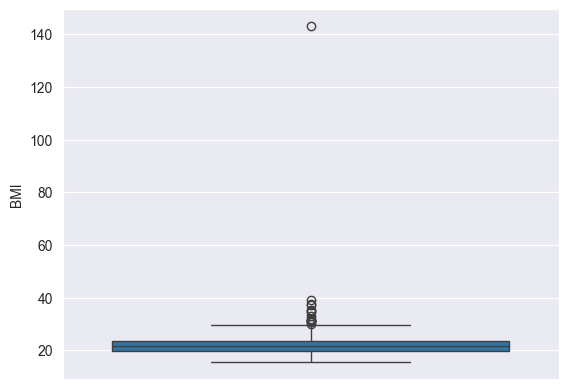

In [42]:
sns.boxplot(data2['BMI'])

<Axes: xlabel='Weight'>

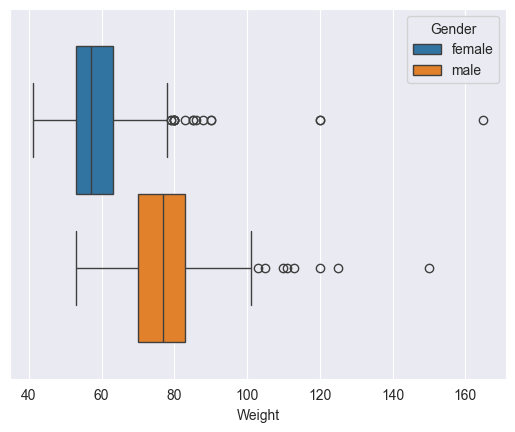

In [34]:
sns.boxplot(x=responses["Weight"], hue=responses["Gender"])

<Axes: xlabel='Height'>

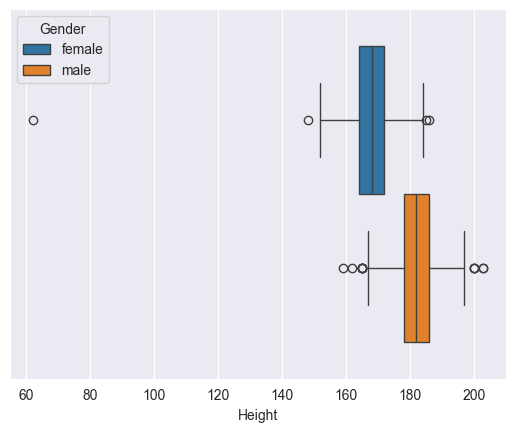

In [88]:
sns.boxplot(x=responses["Height"], hue=responses["Gender"])


In [31]:
import numpy as np

# Example dataset (2D for simplicity)
X = np.array([[1.1, 2.5],
              [1.2, 2.4],
              [0.9, 2.6],
              [3.5, 8.4],
              [3.6, 8.5],
              [10.0, 15.0]])  # This point could be an outlier
# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=3)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X)

# The output is an array where -1 indicates outliers and 1 indicates inliers
y_pred

array([ 1,  1,  1,  1,  1, -1])

In [2]:
# Run this code to create an interactive dashboard using Dash and Plotly
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)
categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 6]
scatter_data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(categories, 50)
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1('Interactive Dashboard Demo: Preattentive Processing', style={'textAlign': 'center'}),
    
    # Bar chart with highlighted element
    html.Div([
        dcc.Graph(
            id='bar-chart',
            figure={
                'data': [
                    go.Bar(
                        x=categories,
                        y=values,
                        marker=dict(color=['grey', 'grey', 'grey', 'red', 'grey'])  # Highlight 'D' in red
                    )
                ],
                'layout': go.Layout(
                    title='Bar Chart Highlighting Outlier with Color',
                    xaxis={'title': 'Categories'},
                    yaxis={'title': 'Values'},
                )
            }
        )
    ]),

    # Scatter plot with outlier
    html.Div([
        dcc.Graph(
            id='scatter-plot',
            figure={
                'data': [
                    go.Scatter(
                        x=scatter_data['x'],
                        y=scatter_data['y'],
                        mode='markers',
                        marker=dict(size=10, color='blue'),
                    ),
                    go.Scatter(
                        x=[0.9],
                        y=[0.1],
                        mode='markers',
                        marker=dict(size=15, color='red'),
                        name='Outlier'
                    )
                ],
                'layout': go.Layout(
                    title='Scatter Plot Highlighting Anomaly',
                    xaxis={'title': 'X-axis'},
                    yaxis={'title': 'Y-axis'}
                )
            }
        )
    ]),

    # Dropdown and interactive bar chart
    html.Div([
        html.Label('Filter by Category:'),
        dcc.Dropdown(
            id='category-filter',
            options=[{'label': c, 'value': c} for c in categories],
            value='A'
        ),
        dcc.Graph(id='filtered-bar-chart')
    ])
])

# Callback for interactive filtered bar chart
@app.callback(
    Output('filtered-bar-chart', 'figure'),
    [Input('category-filter', 'value')]
)
def update_bar_chart(selected_category):
    filtered_data = scatter_data[scatter_data['category'] == selected_category]
    return {
        'data': [
            go.Bar(
                x=[selected_category],
                y=[len(filtered_data)],
                marker=dict(color='green')
            )
        ],
        'layout': go.Layout(
            title=f'Filtered Data for Category: {selected_category}',
            xaxis={'title': 'Category'},
            yaxis={'title': 'Count'}
        )
    }

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\oyutn\AppData\Local\Temp\ipykernel_9904\1160557277.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\oyutn\AppData\Local\Temp\ipykernel_9904\1160557277.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


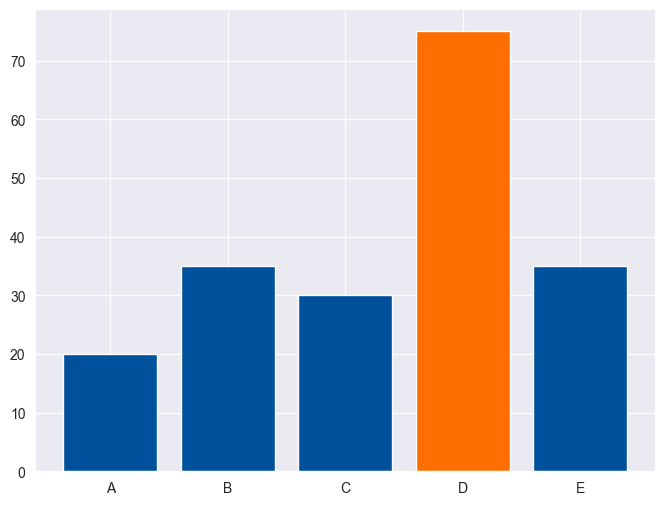

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [20, 35, 30, 75, 35]  # 'E' is the outlier

# Assign colors: highlight 'E' in red
colors = ['#00519b', '#00519b', '#00519b', '#ff6f00', '#00519b']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors)

# Add labels and title


plt.show()


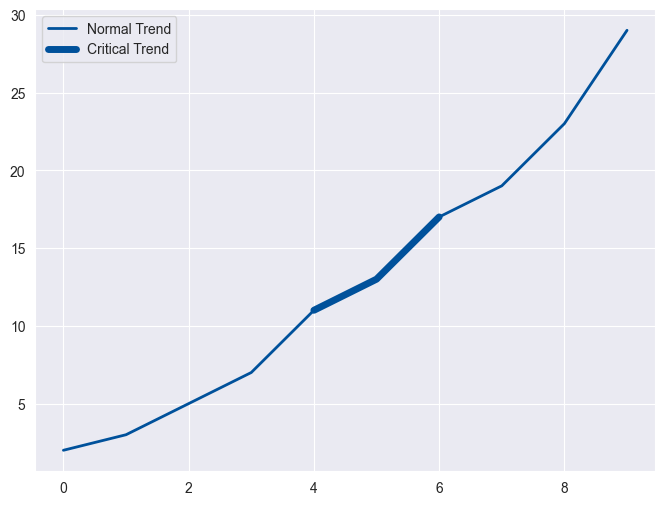

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(0, 10, 1)
y = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# Create the line chart
plt.figure(figsize=(8, 6))
plt.plot(x, y, linewidth=2, label='Normal Trend', color='#00519b')

# Emphasize a critical segment
critical_x = x[4:7]
critical_y = y[4:7]
plt.plot(critical_x, critical_y, linewidth=5, color='#00519b', label='Critical Trend')

# Add labels and title

plt.legend()

plt.show()


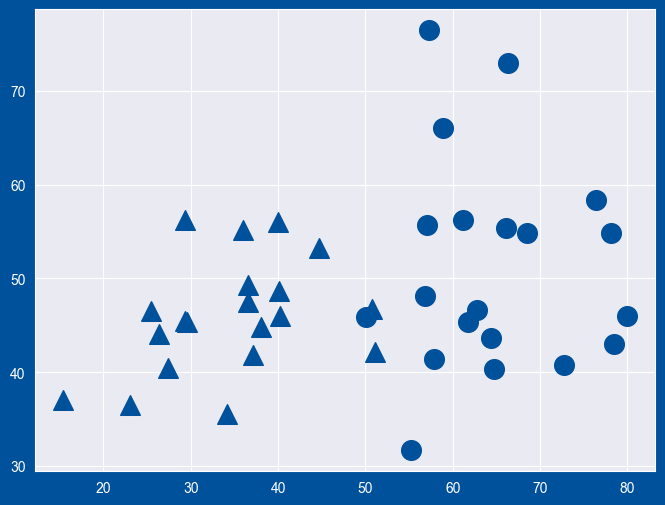

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate main cluster data
# np.random.seed(0)
x = np.random.normal(35, 10, 20)
y = np.random.normal(50, 10, 20)

a = np.random.normal(65, 10, 20)
b = np.random.normal(50, 10, 20)

# Anomalies


# Create the scatter plot
plt.figure(figsize=(8, 6), facecolor='#00519b')
plt.scatter(x, y, color='#00519b', label='A', marker='^', s=200)
plt.scatter(a, b, color='#00519b', label='B', marker='o', s=200)

# plt.gca().set_facecolor('#000000')
plt.tick_params(axis='both', colors='#ffffff')

plt.show()


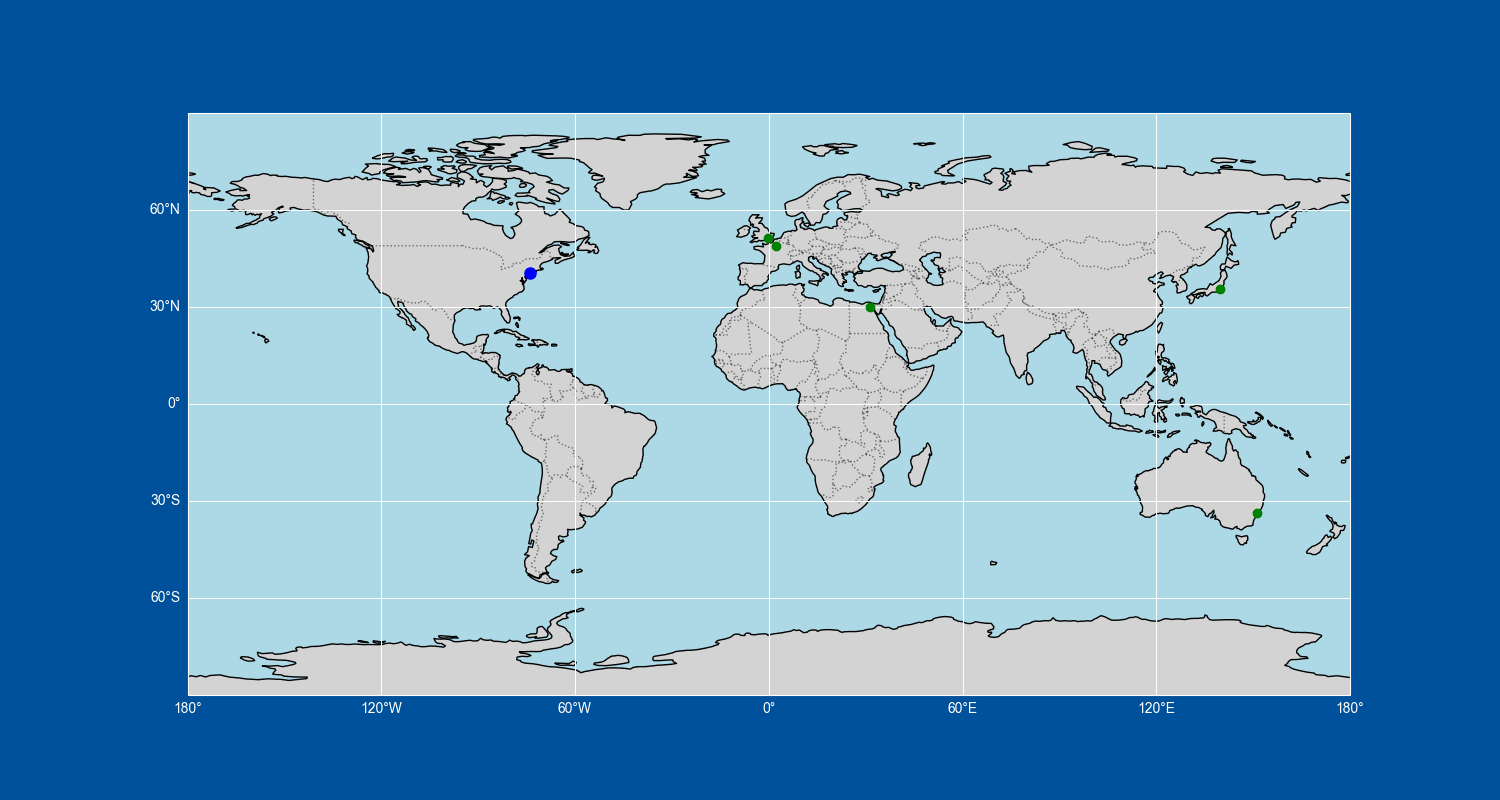

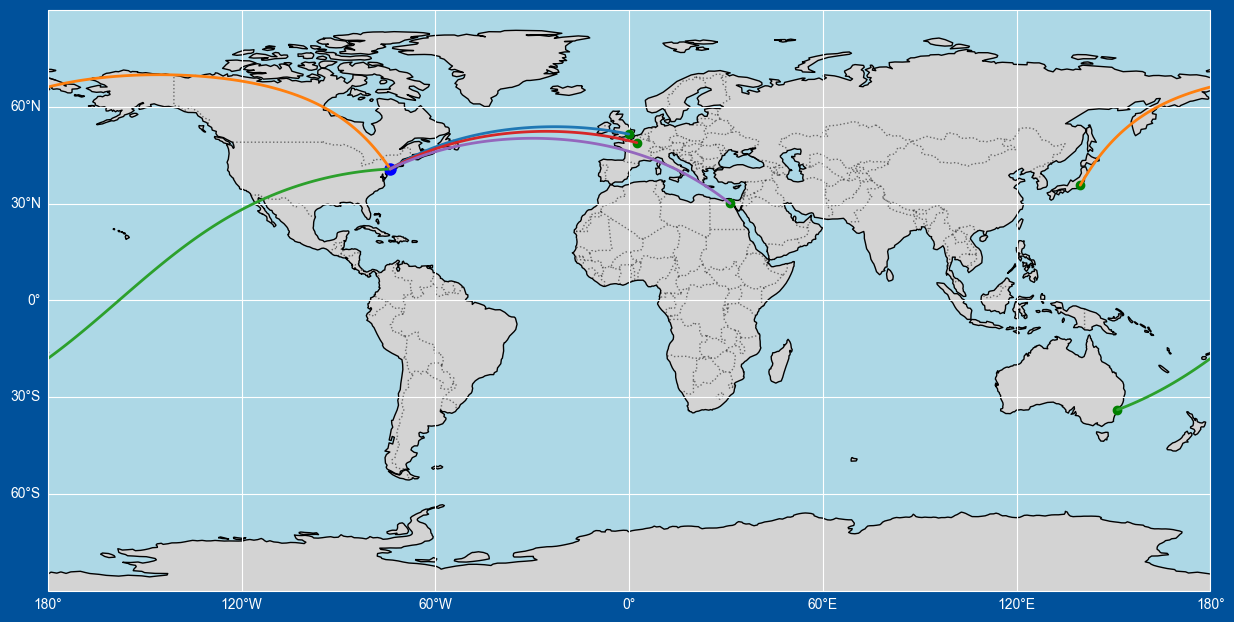

In [67]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Geod
from IPython.display import Image

# Define Origin and Destinations
origin = {'name': 'New York City', 'coordinates': (-74.0060, 40.7128)}

destinations = [
    {'name': 'London', 'coordinates': (-0.1278, 51.5074)},
    {'name': 'Tokyo', 'coordinates': (139.6917, 35.6895)},
    {'name': 'Sydney', 'coordinates': (151.2093, -33.8688)},
    {'name': 'Paris', 'coordinates': (2.3522, 48.8566)},
    {'name': 'Cairo', 'coordinates': (31.2357, 30.0444)},
]

# Create Flows
flows = []
for dest in destinations:
    flow = {
        'start': origin['coordinates'],
        'end': dest['coordinates'],
        'name': f"{origin['name']} to {dest['name']}"
    }
    flows.append(flow)

# Initialize Geod Object
geod = Geod(ellps="WGS84")

num_steps = 100  # Number of animation frames for each flow
extra_steps = int(2.5 * 1000 / 100)  # Extra frames to freeze (1.5 seconds at 100ms per frame)
total_steps = num_steps + extra_steps

# Compute Great-Circle Paths
for flow in flows:
    start_lon, start_lat = flow['start']
    end_lon, end_lat = flow['end']
    
    # Generate intermediate points along the great-circle path
    intermediate_points = geod.npts(start_lon, start_lat, end_lon, end_lat, num_steps - 1)
    lonlats = [(start_lon, start_lat)] + intermediate_points + [(end_lon, end_lat)]
    
    # Store the longitude and latitude positions for the flow
    flow['lon_positions'] = [point[0] for point in lonlats]
    flow['lat_positions'] = [point[1] for point in lonlats]

# Set Up the Map
fig = plt.figure(figsize=(15, 8), facecolor='#00519b')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
plt.tick_params(axis='both', colors='#ffffff')
ax.tick_params(axis='both', colors='#ffffff')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.ylabel_style = {'color': 'white'}
gl.xlabel_style = {'color': 'white'}

# Mark the Origin and Destinations
ax.plot(origin['coordinates'][0], origin['coordinates'][1],
        marker='o', markersize=8, color='blue', transform=ccrs.Geodetic(), label=origin['name'])

for dest in destinations:
    ax.plot(dest['coordinates'][0], dest['coordinates'][1],
            marker='o', markersize=6, color='green', transform=ccrs.Geodetic(), label=dest['name'])

# Initialize Lines for Each Flow
lines = []
for flow in flows:
    line, = ax.plot([], [], lw=2, transform=ccrs.Geodetic(), label=flow['name'])
    lines.append(line)

# Define Initialization and Animation Functions
def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    if i < num_steps:  # Regular animation frames
        for idx, flow in enumerate(flows):
            line = lines[idx]
            lon = flow['lon_positions'][:i+1]  # +1 to include the current point
            lat = flow['lat_positions'][:i+1]
            line.set_data(lon, lat)
    else:  # Extra frames to freeze the animation
        for idx, flow in enumerate(flows):
            line = lines[idx]
            lon = flow['lon_positions']
            lat = flow['lat_positions']
            line.set_data(lon, lat)
    return lines

# Create the Animation
ani = animation.FuncAnimation(
    fig, animate, frames=total_steps, init_func=init,
    blit=True, interval=100, repeat=False
)

plt.tick_params(axis='both', colors='#ffffff')
ax.tick_params(axis='both', colors='#ffffff')


# Save and Display the Animation
ani.save('animated_flow_map_origin_spread.gif', writer='pillow')

# Display the animation in the notebook
Image(open('animated_flow_map_origin_spread.gif','rb').read())


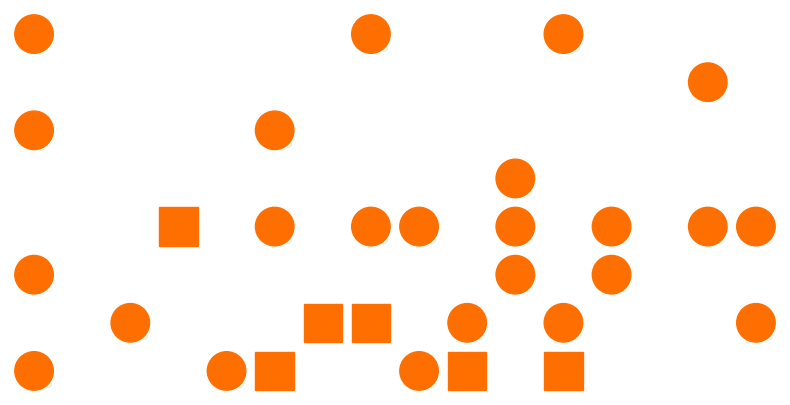

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the dimensions of the grid
rows, cols = 8, 16  # Adjust as needed

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')  # Hide the axes

# Define possible colors and shapes with their respective probabilities
colors = ['white', '#ff6f00']
color_weights = [0.8, 0.2]  # 60% chance for black, 40% for red

shapes = ['circle', 'square']
shape_weights = [0.8, 0.2]  # 70% chance for circle, 30% for square

# Create the grid of shapes
for row in range(rows):
    for col in range(cols):
        # Randomly select color and shape with the specified weights
        color = random.choices(colors, weights=color_weights, k=1)[0]
        shape = random.choices(shapes, weights=shape_weights, k=1)[0]
        
        # Calculate the position for each shape
        x = col + 0.5
        y = rows - row - 0.5

        # Draw the randomly selected shape
        if shape == 'circle':
            circle = plt.Circle((x, y), 0.4, color=color)
            ax.add_patch(circle)
        else:
            square = plt.Rectangle((x - 0.4, y - 0.4), 0.8, 0.8, color=color)
            ax.add_patch(square)
plt.savefig('random_shapes_transparent.png', dpi=300, bbox_inches='tight', transparent=True)
# Display the plot
plt.show()


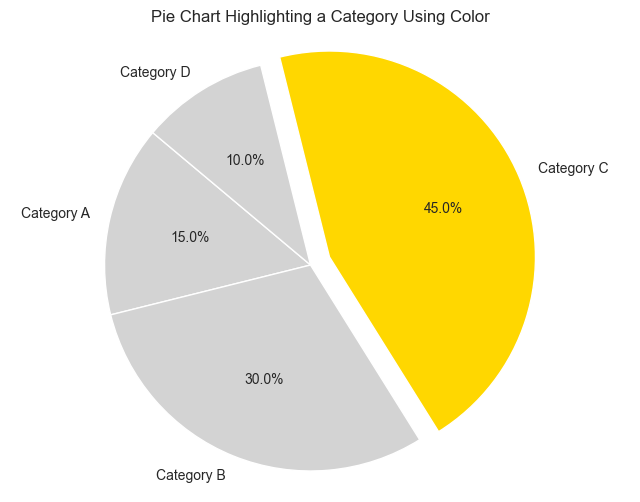

In [9]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [15, 30, 45, 10]  # 'Category C' is the focus

# Colors: highlight 'Category C' in gold
colors = ['lightgray', 'lightgray', 'gold', 'lightgray']

# Explode 'Category C' to emphasize it
explode = (0, 0, 0.1, 0)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Pie Chart Highlighting a Category Using Color')

plt.show()


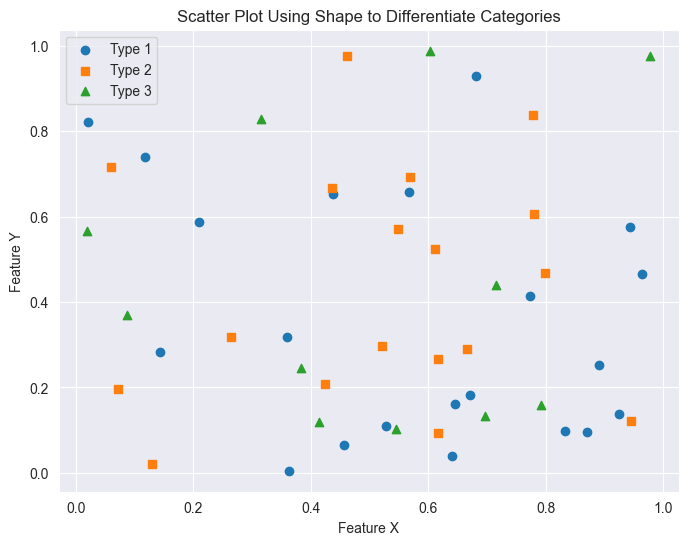

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)

# Categories
category = np.random.choice(['Type 1', 'Type 2', 'Type 3'], size=50)

# Map categories to markers
markers = {'Type 1': 'o', 'Type 2': 's', 'Type 3': '^'}

# Create the scatter plot
plt.figure(figsize=(8, 6))
for c in np.unique(category):
    ix = np.where(category == c)
    plt.scatter(x[ix], y[ix], marker=markers[c], label=c)

# Add labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot Using Shape to Differentiate Categories')
plt.legend()

plt.show()


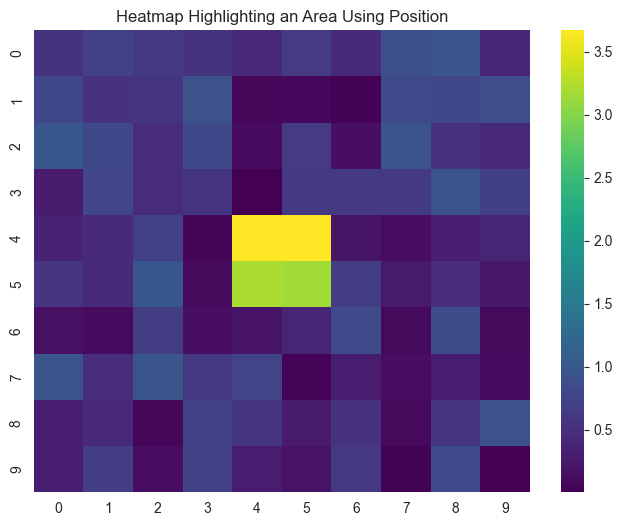

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sample data
np.random.seed(0)
data = np.random.rand(10, 10)

# Introduce high values in a specific area
data[4:6, 4:6] += 3  # Highlighted area

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, cmap='viridis')

# Add title
plt.title('Heatmap Highlighting an Area Using Position')

plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

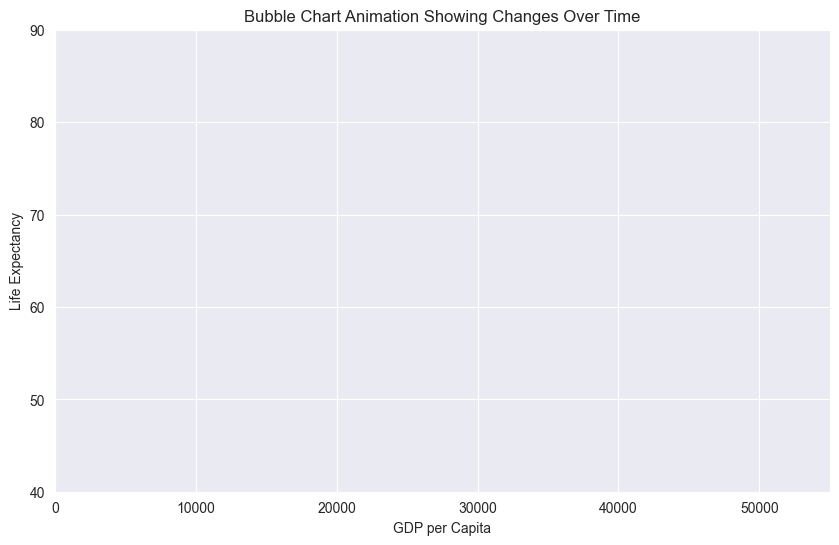

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Sample data: GDP vs Life Expectancy over years for different countries
years = np.arange(2000, 2010)
countries = ['Country A', 'Country B', 'Country C']

# Generate random data
np.random.seed(0)
data = []
for year in years:
    for country in countries:
        gdp = np.random.uniform(1000, 50000)
        life_exp = np.random.uniform(50, 80)
        population = np.random.uniform(1e6, 1e8)
        data.append({'Year': year, 'Country': country, 'GDP': gdp,
                     'LifeExpectancy': life_exp, 'Population': population})

df = pd.DataFrame(data)

# Prepare the figure
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter([], [], s=[], alpha=0.6)

ax.set_xlim(0, 55000)
ax.set_ylim(40, 90)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Expectancy')
ax.set_title('Bubble Chart Animation Showing Changes Over Time')

# Initialization function
def init():
    scatter.set_offsets([])
    scatter.set_sizes([])
    return scatter,

# Animation function
def animate(year):
    data_year = df[df['Year'] == year]
    x = data_year['GDP']
    y = data_year['LifeExpectancy']
    sizes = data_year['Population'] / 1e6  # Scale population for marker size
    scatter.set_offsets(np.column_stack((x, y)))
    scatter.set_sizes(sizes)
    ax.set_title(f'Year: {year}')
    return scatter,

# Create the animation
anim = FuncAnimation(fig, animate, frames=years, init_func=init,
                     interval=1000, blit=True)

# Display the animation
HTML(anim.to_jshtml())
